In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('real_estate.csv', index_col = 'No')

In [3]:
# remove whitespaces from column names

for column in df.columns:
    new_column = column.replace(' ', '_')
    df = df.rename(columns = {column: new_column})

In [4]:
# test train split

X = df[['X1_transaction_date', 'X2_house_age', 'X3_distance_to_MRT', 'X4_number_of_stores', 'X5_latitude', 'X6_longitude']]
y = df['Y_house_price_of_unit_area']

# perform normalization

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [5]:
# model selection

model = LinearRegression()

In [6]:
# train the data

model.fit(X_train, y_train)

LinearRegression()

In [7]:
score = model.score(X_test, y_test)
print("R-squared score:", score)

R-squared score: 0.6810580555095812


In [8]:
# create df to visualize error

predictions = model.predict(X_test)
real_prices = y_test

pred_df = pd.DataFrame( data = {'predictions': predictions, 'real_prices': real_prices})

pred_df['difference'] = abs(pred_df['predictions'] - pred_df['real_prices'])
pred_df['perc_difference'] = (pred_df['difference']/pred_df['real_prices']) * 100

In [9]:
#check average difference predicted vs real

pred_df['perc_difference'].mean()

17.182519158883707

In [10]:
print(pred_df.sort_values(by = 'perc_difference', ascending = False).head(40))

     predictions  real_prices  difference  perc_difference
No                                                        
117     0.735060         12.2   11.464940        93.974919
56     23.279405         13.7    9.579405        69.922666
272    43.724134         26.5   17.224134        64.996733
32     40.368699         25.0   15.368699        61.474797
10     34.992717         22.1   12.892717        58.338085
94     23.620631         16.1    7.520631        46.711996
127    35.266142         62.9   27.633858        43.933002
267    34.111192         23.7   10.411192        43.929081
181     8.865479         15.5    6.634521        42.803360
284    33.091396         23.5    9.591396        40.814452
31     13.178422         22.1    8.921578        40.369132
403    39.697837         28.5   11.197837        39.290655
142    40.127085         28.9   11.227085        38.848045
321    11.599528         18.6    7.000472        37.636945
362    40.053845         63.3   23.246155        36.7237

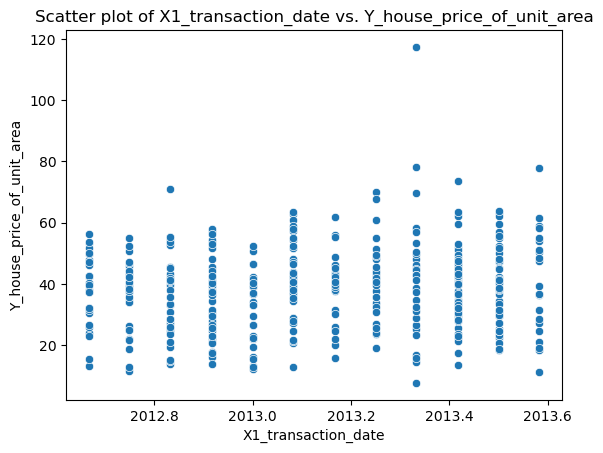

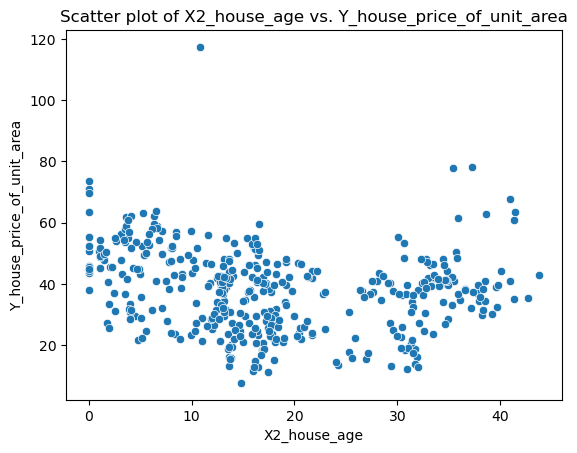

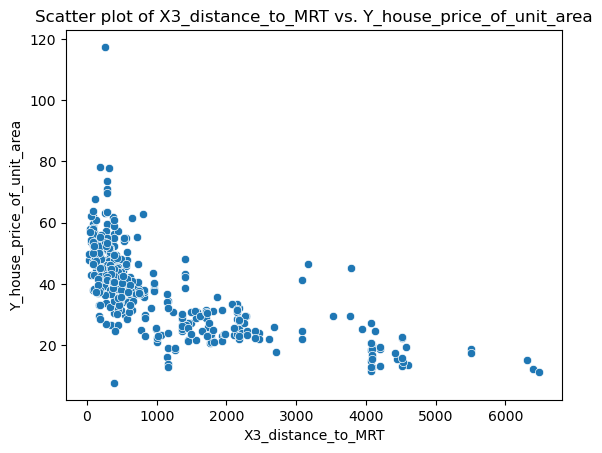

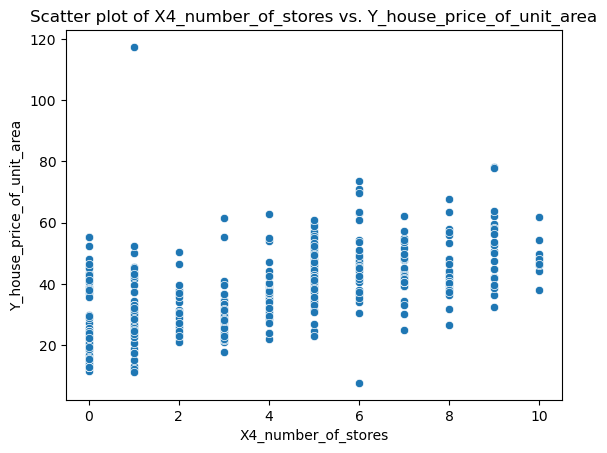

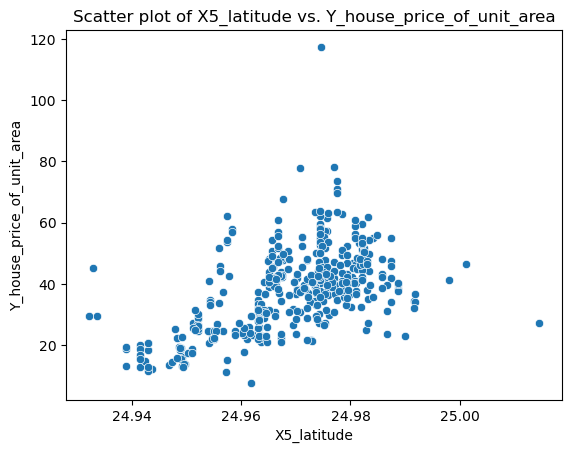

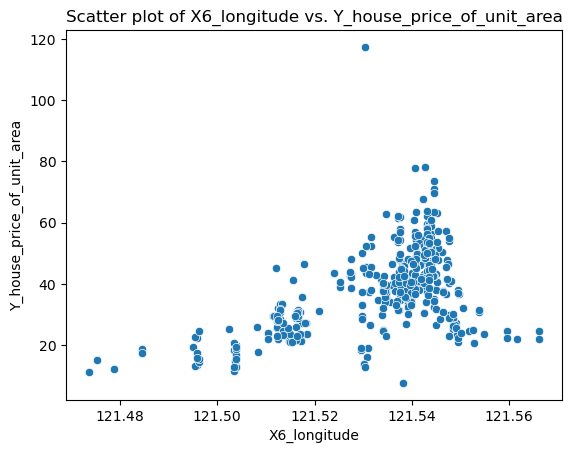

In [11]:
# plot every feature vs target price

for feature in X.columns:
    plt.figure()
    sns.scatterplot(x=X[feature], y=y)
    plt.xlabel(feature)
    plt.ylabel('Y_house_price_of_unit_area')
    plt.title(f'Scatter plot of {feature} vs. Y_house_price_of_unit_area')

plt.show()

In [12]:
# adjust more weight to most improtant features: X3, X5, X6 and retrain the model

feature_weights = {
    'X3_distance_to_MRT': 100.0,
    'X5_latitude': 50.0,
    'X6_longitude': 50.0,
}

for feature, weight in feature_weights.items():
    feature_index = X.columns.get_loc(feature)
    X_scaled[:, feature_index] *= weight
    
model_wght = LinearRegression()
X1_train, X1_test, y1_train, y1_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model_wght.fit(X1_train, y1_train)

LinearRegression()

In [13]:
score1 = model_wght.score(X1_test, y1_test)
print("R-squared score:", score1)

R-squared score: 0.6810580555095809


In [14]:
if score > score1:
    best = 'not weighted'
else:
    best = 'weighted'

print('Better score: ' + best)
print('Difference: ' + str(abs(score - score1)))

Better score: not weighted
Difference: 3.3306690738754696e-16


In [15]:
# remove the top outlier as it seem to affect performance

index_max = df[df['Y_house_price_of_unit_area'] == max(df['Y_house_price_of_unit_area'])].index

df2 = df.drop(index = index_max)

In [17]:
# test train split

X_2 = df2[['X1_transaction_date', 'X2_house_age', 'X3_distance_to_MRT', 'X4_number_of_stores', 'X5_latitude', 'X6_longitude']]
y_2 = df2['Y_house_price_of_unit_area']

# perform normalization

scaler = MinMaxScaler()
X2_scaled = scaler.fit_transform(X_2)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2_scaled, y_2, test_size=0.2, random_state=42)

In [18]:
model_2 = LinearRegression()
model_2.fit(X2_train, y2_train)

LinearRegression()

In [19]:
score2 = model_2.score(X2_test, y2_test)
print("R-squared score:", score2)

R-squared score: 0.5414078091334361
